# Assignment : Advance Regression

### Problem Statement: 1

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market.

You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

 

##### Also, determine the optimal value of lambda for ridge and lasso regression.

 

### Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

### Step 1: Reading, Understanding & Visualising the Data

In [1]:
## Importing python libraries for Exploratory Data Analysis & Machine Learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the training dataset as pandas dataframe.
train = pd.read_csv("train.csv")

In [3]:
# Glimpse of first 5 rows of the dataframe.
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# No. of Rows & Columns in the dataframe.
train.shape

(1460, 81)

This shows that there are 1460 rows with 81 features in the dataset.

In [5]:
# Showing the non-null values and datatype in each column.
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
# Showinf some statistical measures of numerical columns in the dataframe.
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


The above statistics gives following informations about the datset:
- There are total 1460 rows in the dataframe.
- There are missing values present in the dataframe in columns `LotFrontage`, `MasVnrArea` etc.
- The SalePrice(Dependent Variable) is positive skewed as the mean is higher than the median value.
- There are outliers present in a lot of columns including `SalePrice`.

In [7]:
# Showing feature names as a list
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

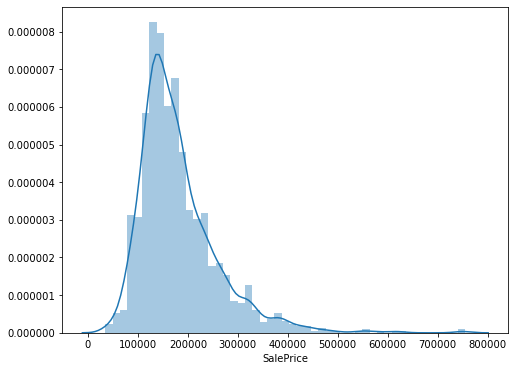

In [8]:
# Showing the histogram of the dependent variable `SalePrice`
plt.figure(figsize=(8,6))
sns.distplot(train['SalePrice']);

The above histogram gives following information about the dependent/target variable.
- It deviates from Normal distribution.
- It shows a positive/right skewness as also evident from the statistical measure as the mean is higher than the median.

In [9]:
cat_vars = train.select_dtypes(include='object').columns
cat_vars

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [10]:
num_vars = train.select_dtypes(include=[np.number]).columns
num_vars

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Here `Id` and `MSSubClass` columns have numerical dtype but the variables are categorical only as evident from the column description.

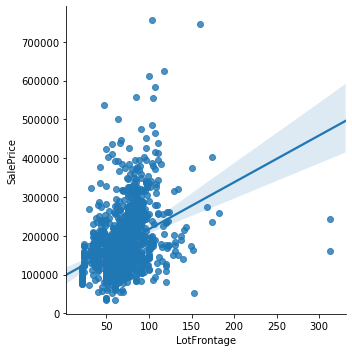

In [11]:
sns.lmplot(x='LotFrontage',y='SalePrice', data=train);

`LotFrontage` and `SalePrice` are not showing substantial linear relationship as shown above.

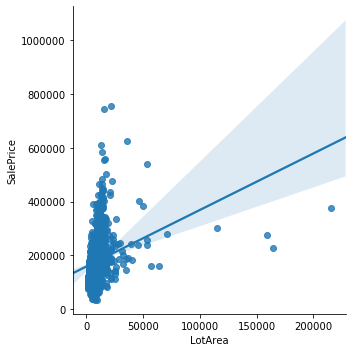

In [12]:
sns.lmplot(x='LotArea',y='SalePrice', data=train);

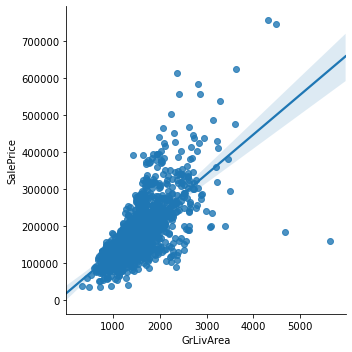

In [13]:
sns.lmplot(x='GrLivArea',y='SalePrice', data=train);

This clearly shows linear relationship between `GrLivArea` and `SalePrice`. `TotalBsmtSF` is another promising feature that can influence the `SalePrice` hence we will see the scatterplot of this feature also to see some linear relationship with target variable(`SalePrice`).

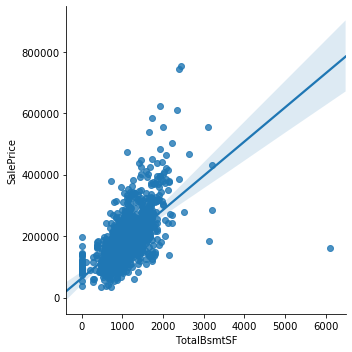

In [14]:
sns.lmplot(x='TotalBsmtSF',y='SalePrice', data=train);

### Outlier Treatment

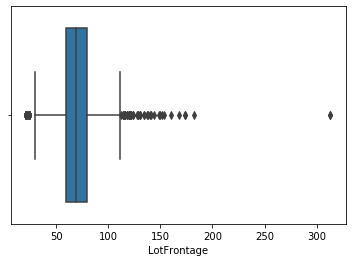

In [15]:
## Plotting BoxPlot to see the spread of values in the `LotFrontage` variable.
sns.boxplot(train['LotFrontage'])

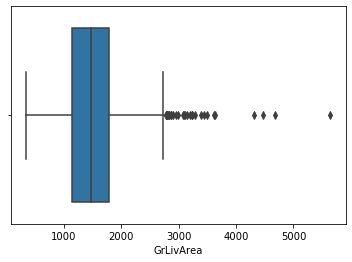

In [16]:
## Plotting BoxPlot to see the spread of values in the `GrLivArea` variable.
sns.boxplot(train['GrLivArea'])

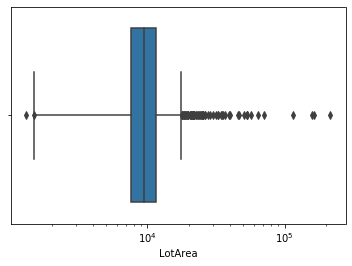

In [17]:
## Plotting BoxPlot to see the spread of values in the `LotArea` variable.
g = sns.boxplot(train['LotArea'])
g.set_xscale('log')

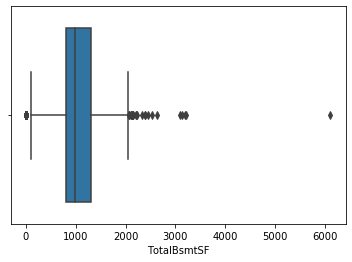

In [18]:
## Plotting BoxPlot to see the spread of values in the `TotalBsmtSF` variable.
sns.boxplot(train['TotalBsmtSF'])

After visualising the box plot and scatter plots it's evident that the `LotFrontage`,`TotalBsmtSF`,`LotArea`,`GrLivArea` have outliers which needs to be removed. However, there are other variables also where there are chances of having outliers. By removing outliers we will lose a lot of data and hence we will not do outlier treatment for all the numerical variables and will try to select a model that can take care of outliers.

In [19]:
vars = ['LotFrontage','TotalBsmtSF','LotArea','GrLivArea']
Q1 = train[vars].quantile(0.05)
Q3 = train[vars].quantile(0.95)
IQR = Q3 - Q1
print(IQR)

LotFrontage       73.00
TotalBsmtSF     1233.70
LotArea        14089.45
GrLivArea       1618.10
dtype: float64


In [20]:
## Removing outliers from the 4 important features which can impact the House Prices mainly. 
train = train[~((train[vars] < (Q1 - 1.5 * IQR)) |(train[vars] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [21]:
## We can see that we have lost only a small amount of rows by removing the outliers.
train.shape

(1444, 81)

### Transforming numerical variable that are basically categorical in nature.

In [22]:
cat_var1 = ['Id', 'MSSubClass','OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd','GarageYrBlt','MoSold', 'YrSold']

In [23]:
for item in cat_var1:
    train[item] = train[item].astype('category')

In [24]:
for item in cat_vars:
    train[item] = train[item].astype('category')

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1444 entries, 0 to 1459
Data columns (total 81 columns):
Id               1444 non-null category
MSSubClass       1444 non-null category
MSZoning         1444 non-null category
LotFrontage      1191 non-null float64
LotArea          1444 non-null int64
Street           1444 non-null category
Alley            91 non-null category
LotShape         1444 non-null category
LandContour      1444 non-null category
Utilities        1444 non-null category
LotConfig        1444 non-null category
LandSlope        1444 non-null category
Neighborhood     1444 non-null category
Condition1       1444 non-null category
Condition2       1444 non-null category
BldgType         1444 non-null category
HouseStyle       1444 non-null category
OverallQual      1444 non-null category
OverallCond      1444 non-null category
YearBuilt        1444 non-null category
YearRemodAdd     1444 non-null category
RoofStyle        1444 non-null category
RoofMatl         14

In [26]:
corrmat = train[num_vars].corr()
corrmat

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
LotFrontage,1.000000,0.629501,0.185070,0.155041,0.046451,0.159326,0.348417,0.405514,0.082775,0.045428,...,0.309724,0.342741,0.104017,0.132621,0.020067,0.079887,0.054805,0.123528,0.006720,0.389668
LotArea,0.629501,1.000000,0.156502,0.194473,0.069967,0.081787,0.316465,0.404677,0.114974,0.032985,...,0.280882,0.320139,0.173724,0.144200,0.014536,0.069544,0.106786,0.096361,0.046119,0.385322
MasVnrArea,0.185070,0.156502,1.000000,0.236904,-0.069171,0.116472,0.344494,0.325933,0.159814,-0.069431,...,0.362248,0.362679,0.155941,0.104952,-0.109315,0.019978,0.058917,-0.020605,-0.030617,0.482627
BsmtFinSF1,0.155041,0.194473,0.236904,1.000000,-0.055371,-0.521788,0.459471,0.387459,-0.168584,-0.066212,...,0.222258,0.265914,0.182519,0.069651,-0.101269,0.030791,0.068901,0.054329,0.003474,0.396722
BsmtFinSF2,0.046451,0.069967,-0.069171,-0.055371,1.000000,-0.204455,0.106689,0.095997,-0.094450,0.016117,...,-0.041820,-0.017911,0.075717,0.012520,0.039270,-0.029799,0.095218,0.047996,0.005332,-0.022453
BsmtUnfSF,0.159326,0.081787,0.116472,-0.521788,-0.204455,1.000000,0.449900,0.343722,0.000997,0.027696,...,0.219613,0.190668,0.004634,0.128352,-0.003643,0.020282,-0.013723,-0.035396,-0.023631,0.228373
TotalBsmtSF,0.348417,0.316465,0.344494,0.459471,0.106689,0.449900,1.000000,0.807401,-0.210319,-0.032988,...,0.450058,0.473601,0.223651,0.214583,-0.094101,0.042297,0.093394,0.036958,-0.019644,0.648167
1stFlrSF,0.405514,0.404677,0.325933,0.387459,0.095997,0.343722,0.807401,1.000000,-0.231417,-0.012230,...,0.447022,0.475654,0.225963,0.183294,-0.061290,0.061594,0.095447,0.064204,-0.021957,0.628056
2ndFlrSF,0.082775,0.114974,0.159814,-0.168584,-0.094450,0.000997,-0.210319,-0.231417,1.000000,0.064382,...,0.180129,0.132563,0.086606,0.196759,0.064292,-0.024212,0.031201,0.074780,0.016497,0.320980
LowQualFinSF,0.045428,0.032985,-0.069431,-0.066212,0.016117,0.027696,-0.032988,-0.012230,0.064382,1.000000,...,-0.094017,-0.067294,-0.024286,0.019568,0.060721,-0.004451,0.027218,0.066360,-0.003712,-0.024331


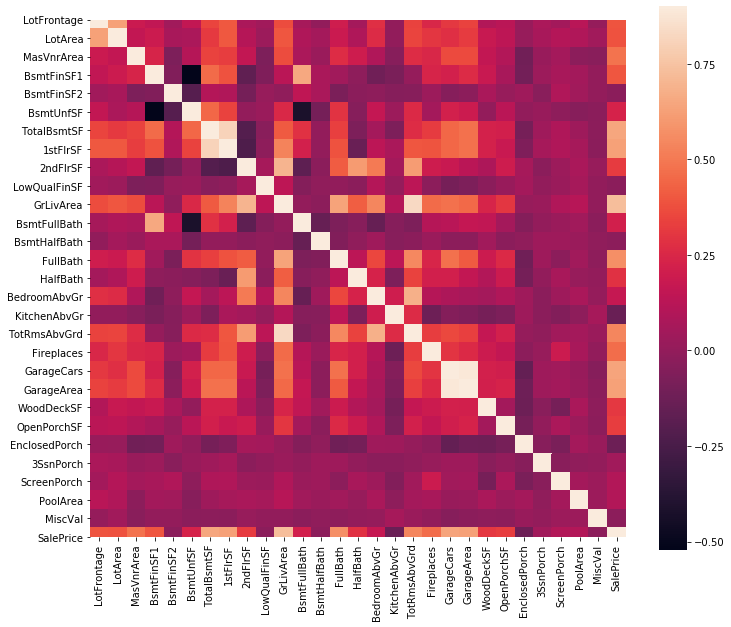

In [27]:
# Correlation heatmap for visualising the correlation of Numerical features with target Variable.
plt.figure(figsize=(12,10))
sns.heatmap(corrmat,square=True,vmax=0.9)

Here from the correlation heatmap it's clearly visible that the `SalePrice` variable (target Variable) is correlated positively with `GarageArea`, `FullBath`, `GrLivArea`, `1stFlrSF`,`2ndFlrSF`,`TotalBsmtSF`etc.

Now all the features are converted either in numerical or categorical datatypes.

In [28]:
# Columns with Numerical Data Type
num_vars = train.select_dtypes(include=[np.number]).columns
num_vars

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')

In [29]:
## Continuous numerical variables
cont_var = ["LotArea","GrLivArea","GarageArea","WoodDeckSF", "OpenPorchSF","SalePrice"]

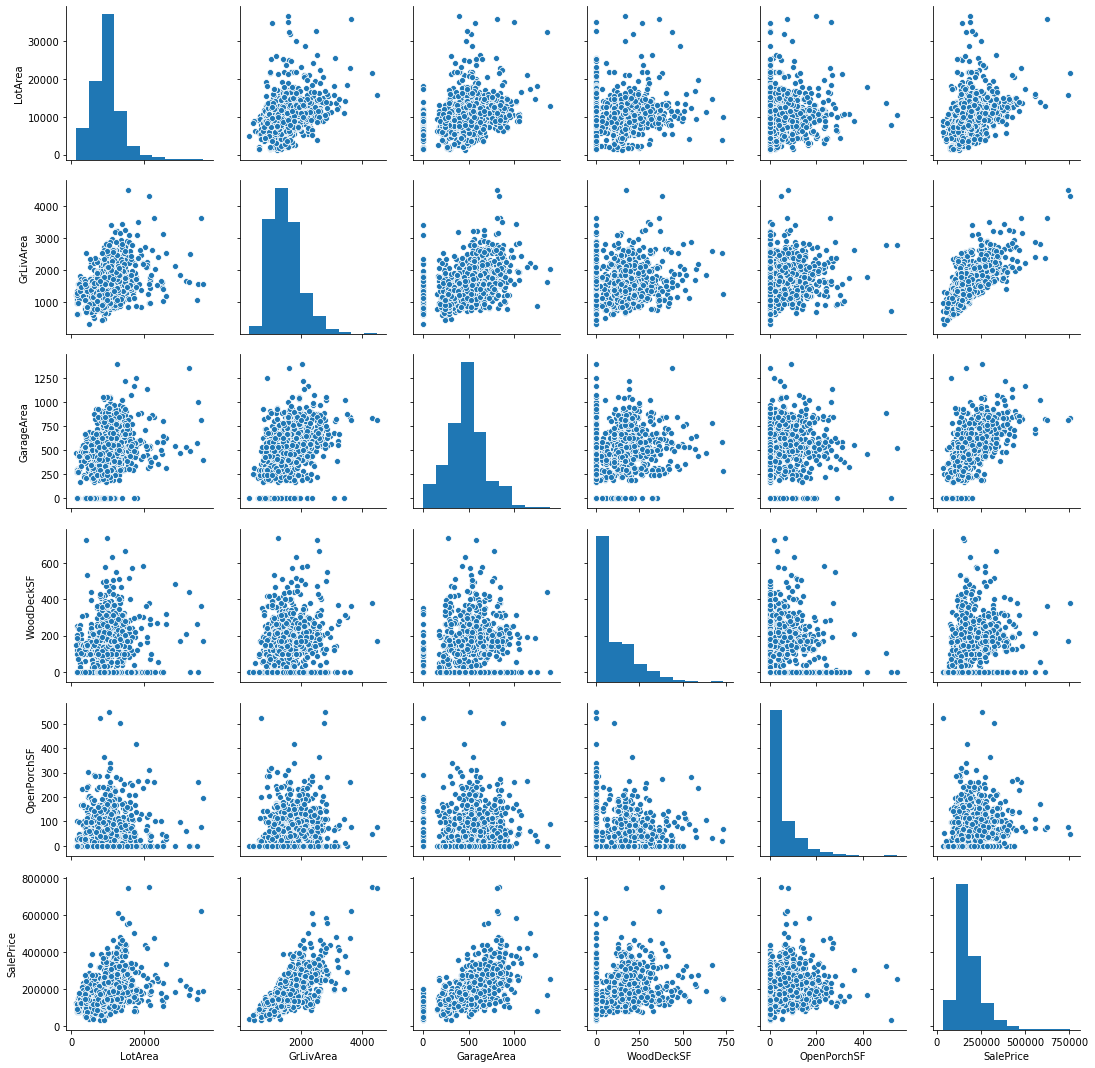

In [30]:
## Pairplot of continuous numerical variables.
train_cont = train[cont_var]
sns.pairplot(train_cont);

Above pairplot indicates linear relationship between `SalePrice` and `GrLivArea`.

In [31]:
# Columns/Features with Categorical Datatype
cat_vars = train.select_dtypes('category').columns
cat_vars

Index(['Id', 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

Since there are a lot of categorical variables it's tough to plot the relationship of `SalePrice` and all the categorical variables. Hence, based on the data description we will see the relationship of target variable with few of the important categorical variables.

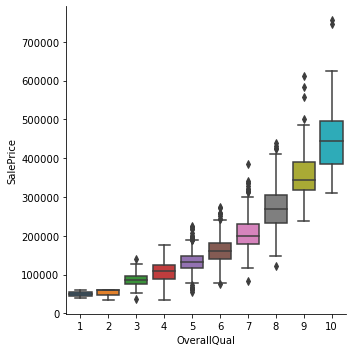

In [32]:
# Boxplot between OverallQual and SalePrice.
sns.catplot(x="OverallQual", y="SalePrice", kind="box", data=train);

This clearly shows that the `SalePrice` increases with increase in `OverallQual` as expected.

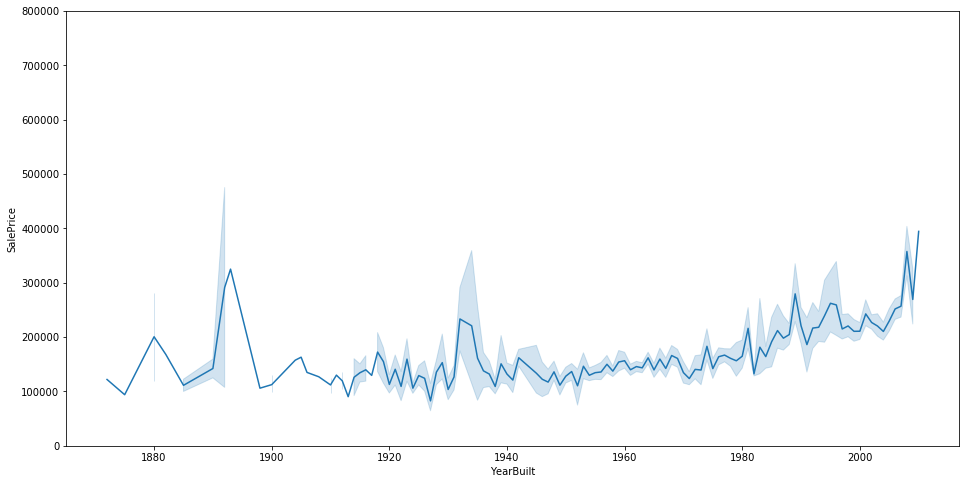

In [33]:
# Lineplot between YearBuilt and SalePrice.
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.lineplot(x='YearBuilt', y="SalePrice", data=train)
fig.axis(ymin=0, ymax=800000);

From the above lineplot although the tendency is not very strong but we can say that the `SalePrice` of newer houses will be more.

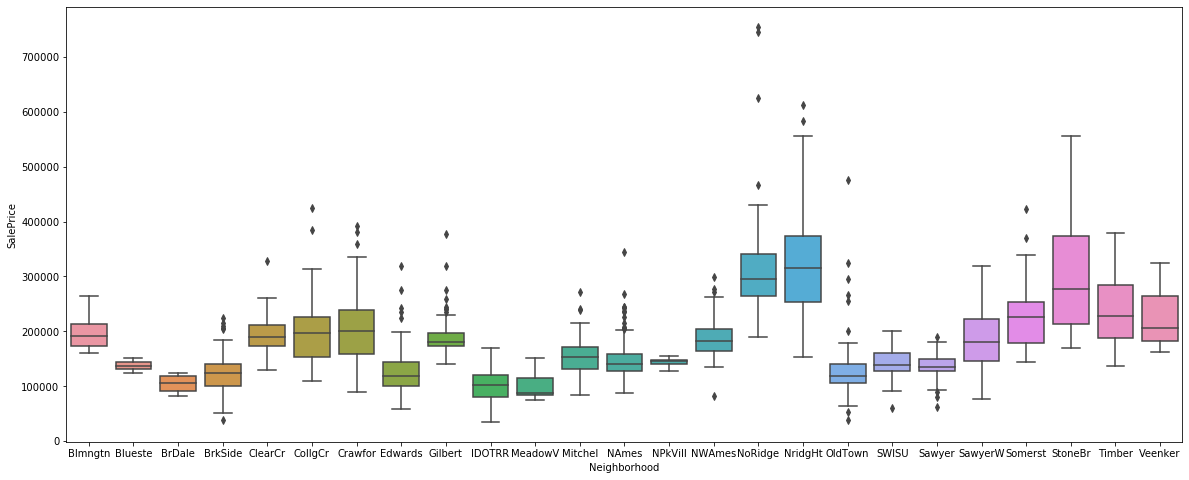

In [34]:
# Boxplot between OverallQual and SalePrice.
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.boxplot(x='Neighborhood', y="SalePrice", data=train)

This is not showing any correlation/trend between Neighborhood and SalePrice of houses. The SalePrices are higher for `Stone Brook` and `Northridge Heights`.

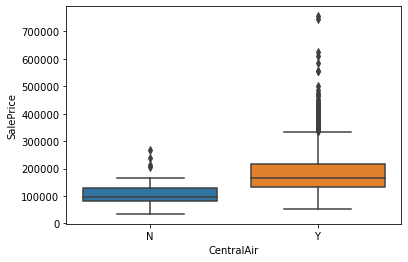

In [35]:
# Boxplot between OverallQual and SalePrice.
sns.boxplot(x='CentralAir', y="SalePrice", data=train);

As evident `Centralised Air Conditioning` has major impact on house prices and houses with Cental Air Conditioning are selling at higher cost.

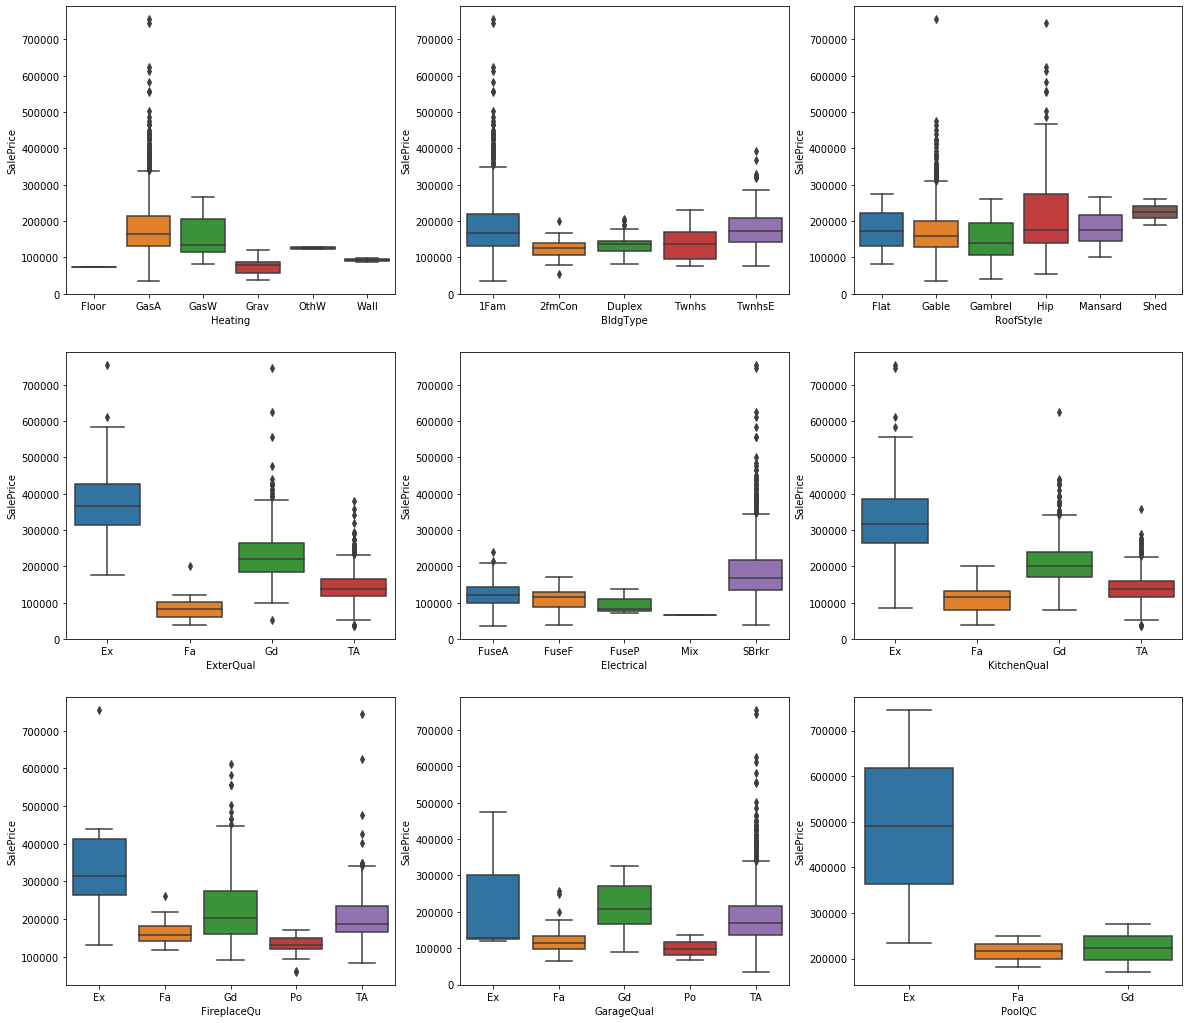

In [36]:
plt.figure(figsize=(20,18))

plt.subplot(3,3,1)
sns.boxplot(x="Heating", y="SalePrice", data=train)
plt.subplot(3,3,2)
sns.boxplot(x="BldgType", y="SalePrice",data=train)
plt.subplot(3,3,3)
sns.boxplot(x="RoofStyle", y="SalePrice",data=train)
plt.subplot(3,3,4)
sns.boxplot(x="ExterQual", y="SalePrice",data=train)
plt.subplot(3,3,5)
sns.boxplot(x="Electrical", y="SalePrice",data=train)
plt.subplot(3,3,6)
sns.boxplot(x="KitchenQual", y="SalePrice",data=train)
plt.subplot(3,3,7)
sns.boxplot(x="FireplaceQu", y="SalePrice",data=train)
plt.subplot(3,3,8)
sns.boxplot(x="GarageQual", y="SalePrice",data=train)
plt.subplot(3,3,9)
sns.boxplot(x="PoolQC", y="SalePrice",data=train)

As evident `PoolQC`,`FireplaceQu`,`ExterQual` and `KitchenQual` significantly influences the `SalePrice` of the house.

### Missing Value treatment

In [37]:
null_columns=train.columns[train.isnull().any()]
round((100* train[null_columns].isnull().sum())/len(train),2)

LotFrontage     17.52
Alley           93.70
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.56
BsmtCond         2.56
BsmtExposure     2.63
BsmtFinType1     2.56
BsmtFinType2     2.63
Electrical       0.07
FireplaceQu     47.78
GarageType       5.61
GarageYrBlt      5.61
GarageFinish     5.61
GarageQual       5.61
GarageCond       5.61
PoolQC          99.58
Fence           80.54
MiscFeature     96.40
dtype: float64

In [38]:
train[null_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1444 entries, 0 to 1459
Data columns (total 19 columns):
LotFrontage     1191 non-null float64
Alley           91 non-null category
MasVnrType      1436 non-null category
MasVnrArea      1436 non-null float64
BsmtQual        1407 non-null category
BsmtCond        1407 non-null category
BsmtExposure    1406 non-null category
BsmtFinType1    1407 non-null category
BsmtFinType2    1406 non-null category
Electrical      1443 non-null category
FireplaceQu     754 non-null category
GarageType      1363 non-null category
GarageYrBlt     1363 non-null category
GarageFinish    1363 non-null category
GarageQual      1363 non-null category
GarageCond      1363 non-null category
PoolQC          6 non-null category
Fence           281 non-null category
MiscFeature     52 non-null category
dtypes: category(17), float64(2)
memory usage: 103.9 KB


In [39]:
train.shape

(1444, 81)

Now we will impute/treat missing values one by one to remove any missing values in the dataframe. First we will treat numerical columns for missing values.

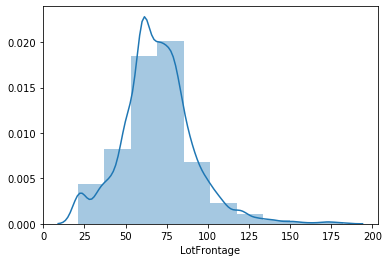

In [40]:
sns.distplot(train['LotFrontage'],bins=10);

In [41]:
train['LotFrontage'].describe()

count    1191.000000
mean       69.560873
std        22.046920
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       182.000000
Name: LotFrontage, dtype: float64

The above feature is very slightly positive skewed as the mean is higher than the median hence we will impute the median value inplace of null value.

In [42]:
# Imputing Median in place of missing values.
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].median())

In [43]:
## Filling the missing values by median ie 0.
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)

In [44]:
null_columns=train.columns[train.isnull().any()]
round((100* train[null_columns].isnull().sum())/len(train),2)

Alley           93.70
MasVnrType       0.55
BsmtQual         2.56
BsmtCond         2.56
BsmtExposure     2.63
BsmtFinType1     2.56
BsmtFinType2     2.63
Electrical       0.07
FireplaceQu     47.78
GarageType       5.61
GarageYrBlt      5.61
GarageFinish     5.61
GarageQual       5.61
GarageCond       5.61
PoolQC          99.58
Fence           80.54
MiscFeature     96.40
dtype: float64

Now all the missing value columns are categorical in nature. We will try to impute mode in most of the cases. However, the columns with more than 70% data as missing is of no value for us and hence we will drop these features as it will not add any value to our model.

In [45]:
## Removing columns with more than 70% missing values.
train = train.drop(['Alley','PoolQC','Fence','MiscFeature'], axis=1)

In [46]:
null_columns=train.columns[train.isnull().any()]
round((100* train[null_columns].isnull().sum())/len(train),2)

MasVnrType       0.55
BsmtQual         2.56
BsmtCond         2.56
BsmtExposure     2.63
BsmtFinType1     2.56
BsmtFinType2     2.63
Electrical       0.07
FireplaceQu     47.78
GarageType       5.61
GarageYrBlt      5.61
GarageFinish     5.61
GarageQual       5.61
GarageCond       5.61
dtype: float64

In [47]:
## Filling the rest of categorical features having null values with mode.
for i in null_columns:
    train[i] = train[i].fillna(train[i].mode()[0])

In [48]:
null_columns=train.columns[train.isnull().any()]
round((100* train[null_columns].isnull().sum())/len(train),2)

Series([], dtype: float64)

Now we have completed the null value treatment of all the features and the dataframe is having no null value.

### Deriving new Metrices

Let's create one new feature called TotalSF representing the total Sq. Ft are of the house inclusing all the floors.

In [49]:
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

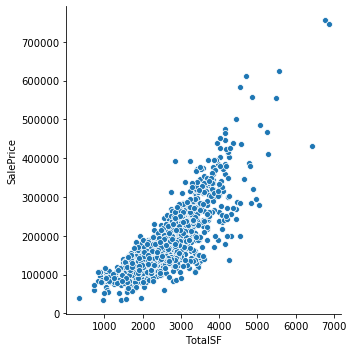

In [50]:
sns.relplot(x="TotalSF",y="SalePrice", data=train)

Here we can easily visualise that the new feature created is linearly correlated with the SalePrice of house.

let's drop the `Id` column as it's not adding any value in model building. 

In [51]:
df = train.drop('Id', axis=1)

In [52]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500,2566
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500,2524
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500,2706
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000,2473
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000,3343


#### Creating Dummy Variable(OneHotEncoding) for categorical Variables


In [53]:
cols = df.select_dtypes(include='category').columns

In [54]:

dummy1 = pd.get_dummies(df[cols], drop_first=True)
df = pd.concat([df,dummy1], axis=1)

In [55]:
df = df.drop(cols,axis=1)

In [56]:
df.shape

(1444, 540)

In [57]:
df.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,0,0,1,0,0,0,1,0


## Splitting in Test & Train Set

In [58]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size = 0.7, random_state=100, test_size=0.3)

In [59]:
df_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
161,110.0,13688,664.0,1016,0,556,1572,1572,1096,0,...,0,0,0,0,1,0,0,0,1,0
460,75.0,8004,110.0,544,0,288,832,832,1103,0,...,0,0,1,0,0,0,0,0,0,1
554,85.0,10625,292.0,866,0,132,998,1006,1040,0,...,0,0,0,0,1,0,0,0,1,0
107,50.0,6000,0.0,104,169,516,789,789,0,0,...,0,0,0,0,1,0,0,0,0,1
1307,60.0,8072,0.0,746,0,244,990,990,0,0,...,0,0,0,0,1,0,0,0,1,0


In [60]:
df_train.shape

(1010, 540)

In [61]:
df_test.shape

(434, 540)

### Feature Scaling

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [63]:
num_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice']

In [64]:
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

In [65]:
df_test[num_cols]= scaler.transform(df_test[num_cols])

In [66]:
df_train.shape

(1010, 540)

## Model Building

In [67]:
# split into X and y for both train and test sets
y_train = df_train.pop('SalePrice')
X_train = df_train

In [68]:
## Dividing into X_test and y_test
y_test = df_test.pop('SalePrice')
X_test = df_test

In [69]:
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
161,0.552795,0.359489,0.41500,0.464351,0.000000,0.258244,0.490331,0.427782,0.585470,0.0,...,0,0,0,0,1,0,0,0,1,0
460,0.335404,0.194544,0.06875,0.248629,0.000000,0.133767,0.259513,0.172080,0.589209,0.0,...,0,0,1,0,0,0,0,0,0,1
554,0.397516,0.270604,0.18250,0.395795,0.000000,0.061310,0.311291,0.232205,0.555556,0.0,...,0,0,0,0,1,0,0,0,1,0
107,0.180124,0.136390,0.00000,0.047532,0.150893,0.239666,0.246101,0.157222,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,1
1307,0.242236,0.196518,0.00000,0.340951,0.000000,0.113330,0.308796,0.226676,0.000000,0.0,...,0,0,0,0,1,0,0,0,1,0


In [70]:
X_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1256,0.434783,0.377336,0.346250,0.600548,0.0,0.312123,0.619464,0.571182,0.000000,0.0,...,0,0,0,0,1,0,0,0,1,0
30,0.180124,0.208938,0.000000,0.000000,0.0,0.301440,0.202433,0.108846,0.356838,0.0,...,0,0,0,0,1,0,0,0,1,0
899,0.273292,0.165206,0.000000,0.212523,0.0,0.207617,0.284467,0.311679,0.000000,0.0,...,0,0,0,0,1,0,0,0,1,0
1204,0.354037,0.256529,0.000000,0.360146,0.0,0.124477,0.329382,0.255701,0.000000,0.0,...,0,0,0,0,1,0,0,0,1,0
278,0.534161,0.381602,0.196875,0.000000,0.0,0.985137,0.661572,0.617484,0.000000,0.0,...,0,0,1,0,0,0,0,0,0,1


##### Here we can see that we have more than 500 features, hence for feature selection and hyperparameter tuning we will take help of Grid Search Cross Validation Scheme.

### Model Building & Evaluation

In [71]:
len(X_train.columns)

539

In [72]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [73]:
## First we will use simple linear regression model using all the features.
lm = LinearRegression()
lm.fit(X_train,y_train)
y_train_pred_lm = lm.predict(X_train)
sklearn.metrics.r2_score(y_true=y_train,y_pred=y_train_pred_lm)

0.9631781614255744

In [74]:
y_test_pred_lm = lm.predict(X_test)
sklearn.metrics.r2_score(y_true=y_test,y_pred=y_test_pred_lm)

-1067929671.0972418

A negative r-squared score on test data shows a very poorly fitted model.

#### Ridge Regression with GridSearch Cross Validation

In [75]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_ridge.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   41.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [76]:
cv_results_ridge = pd.DataFrame(model_cv_ridge.cv_results_)
cv_results_ridge = cv_results_ridge[cv_results_ridge['param_alpha']<=200]
cv_results_ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.182726,0.034965,0.019630,0.033061,0.0001,{'alpha': 0.0001},0.542113,0.695610,0.606940,0.672200,...,0.659800,0.081298,28,0.972527,0.971541,0.969989,0.975071,0.970718,0.971969,0.001766
1,0.298115,0.152244,0.039576,0.044741,0.001,{'alpha': 0.001},0.554006,0.701783,0.662895,0.681131,...,0.677182,0.074645,27,0.972524,0.971539,0.969971,0.975060,0.970712,0.971961,0.001767
2,0.203961,0.060183,0.020386,0.034568,0.01,{'alpha': 0.01},0.623856,0.742594,0.761739,0.725446,...,0.731835,0.060237,26,0.972393,0.971439,0.969756,0.974778,0.970583,0.971790,0.001733
3,0.222449,0.069260,0.055014,0.042228,0.05,{'alpha': 0.05},0.720750,0.804886,0.812787,0.788336,...,0.792659,0.039165,24,0.971642,0.970719,0.968990,0.973759,0.969989,0.971020,0.001623
4,0.184645,0.035831,0.073054,0.034926,0.1,{'alpha': 0.1},0.761515,0.831472,0.831955,0.813839,...,0.818197,0.030835,22,0.970770,0.969874,0.968216,0.972849,0.969282,0.970198,0.001564


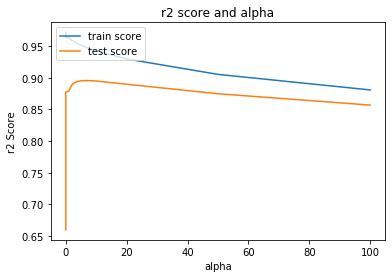

In [77]:
# plotting mean test and train scores with alpha 
cv_results_ridge['param_alpha'] = cv_results_ridge['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_train_score'])
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 Score')
plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

We can easily visualise that the test score peaks out at alpha level of around 4.

In [78]:
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=4, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [79]:
y_train_pred_ridge = ridge.predict(X_train)
sklearn.metrics.r2_score(y_true=y_train,y_pred=y_train_pred_ridge)

0.9500633560099855

In [80]:
y_test_pred_ridge = ridge.predict(X_test)
sklearn.metrics.r2_score(y_true=y_test,y_pred=y_test_pred_ridge)

0.9041061348031552

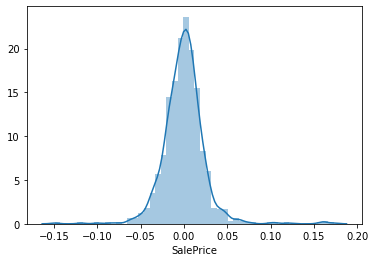

In [81]:
# Now let's check the error terms are also normally distributed as per the assumptions of linear regression model. 
# The below mentioned histogram is almost showing a normal curve with mean value centered around zero and similar slight bulge arounf the tail.
res_ridge = y_train - y_train_pred_ridge
sns.distplot(res_ridge)

#### Model Evaluation

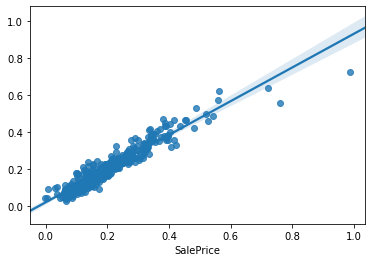

In [82]:
sns.regplot(y_test,y_test_pred_ridge)

In [83]:
## Ridge Model Parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0,ridge.intercept_)
model_parameters = [round(x,3) for x in model_parameters]
cols = X_test.columns
cols = cols.insert(0, "constant")
param_df_ridge = pd.DataFrame({"model_parameters":model_parameters ,"cols": cols})
param_df_ridge

,model_parameters,cols
0,0.011,constant
1,0.015,LotFrontage
2,0.029,LotArea
3,0.035,MasVnrArea
4,0.020,BsmtFinSF1
5,-0.007,BsmtFinSF2
6,-0.041,BsmtUnfSF
7,-0.016,TotalBsmtSF
8,0.002,1stFlrSF
9,0.024,2ndFlrSF


In [84]:
## Features with non-zero co-efficients
param_df_ridge[(param_df_ridge != 0).all(1)]

,model_parameters,cols
0,0.011,constant
1,0.015,LotFrontage
2,0.029,LotArea
3,0.035,MasVnrArea
4,0.020,BsmtFinSF1
5,-0.007,BsmtFinSF2
6,-0.041,BsmtUnfSF
7,-0.016,TotalBsmtSF
8,0.002,1stFlrSF
9,0.024,2ndFlrSF


As we can see that the no. of features available in Ridge Regression model is 493 and it has removed only 47 features. With so many independent variables this model is very complex and we need to do feature reduction for a simpler model. We will use Lasso Regression with FridSearch Cross-Validation as our next model since, lasso regression for feature selection. 

### Lasso Regression with GridSearch Cross Validation

In [86]:
params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.1, 1]}
lasso = Lasso()

# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   10.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [87]:
cv_results_lasso = pd.DataFrame(model_cv_lasso.cv_results_)
cv_results_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.705685,0.143284,0.003413,0.000442,1e-05,{'alpha': 1e-05},0.788945,0.856083,0.856035,0.846521,...,0.844821,0.029606,3,0.968289,0.966968,0.965067,0.969723,0.965956,0.967200,0.001656
1,0.386647,0.092322,0.020891,0.035978,0.0001,{'alpha': 0.0001},0.910588,0.901975,0.908360,0.874240,...,0.900172,0.013280,1,0.946141,0.947110,0.943465,0.950879,0.946141,0.946747,0.002396
2,0.315927,0.148973,0.021034,0.036137,0.001,{'alpha': 0.001},0.871989,0.865857,0.858297,0.863438,...,0.862817,0.006055,2,0.883765,0.877563,0.875800,0.885660,0.872428,0.879043,0.004951
3,0.119908,0.035423,0.039083,0.044208,0.01,{'alpha': 0.01},0.702351,0.688190,0.713028,0.683608,...,0.692549,0.013437,4,0.699082,0.692803,0.690177,0.695962,0.700879,0.695780,0.003929
4,0.139790,0.046407,0.022108,0.035263,0.1,{'alpha': 0.1},0.685767,0.681033,0.704363,0.674551,...,0.682837,0.012249,6,0.684998,0.686649,0.678840,0.687930,0.689998,0.685683,0.003792


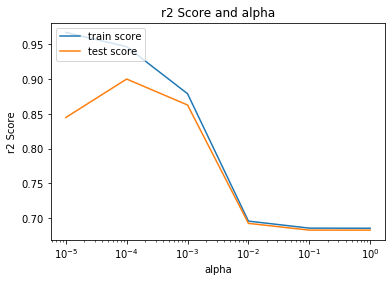

In [88]:
# plotting mean test and train scoes with alpha 
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 Score')

plt.title("r2 Score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xscale('log')
plt.show()

We can easily visualise that the test score peaks out at alpha level of around 0.0001.

In [89]:
alpha = .0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [90]:
y_train_pred_lasso = lasso.predict(X_train)
sklearn.metrics.r2_score(y_true=y_train,y_pred=y_train_pred_lasso)

0.9415137942003301

In [91]:
y_test_pred_lasso = lasso.predict(X_test)
sklearn.metrics.r2_score(y_true=y_test,y_pred=y_test_pred_lasso)

0.9061229685591894

In [92]:
## Lasso Model Parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0,lasso.intercept_)
model_parameters = [round(x,3) for x in model_parameters]
cols = X_test.columns
cols = cols.insert(0, "constant")
param_df_lasso = pd.DataFrame({"model_parameters":model_parameters ,"cols": cols})
param_df_lasso

,model_parameters,cols
0,-0.002,constant
1,0.007,LotFrontage
2,0.033,LotArea
3,0.040,MasVnrArea
4,0.000,BsmtFinSF1
5,-0.009,BsmtFinSF2
6,-0.067,BsmtUnfSF
7,-0.000,TotalBsmtSF
8,0.000,1stFlrSF
9,0.005,2ndFlrSF


In [95]:
# Features with Non-Zero Coefficients
feature_coef = param_df_lasso[(param_df_lasso != 0).all(1)]

In [98]:
feature_coef.sort_values(by="model_parameters")

,model_parameters,cols
6,-0.067,BsmtUnfSF
17,-0.031,KitchenAbvGr
122,-0.027,OverallCond_3
123,-0.020,OverallCond_4
356,-0.019,BsmtQual_TA
387,-0.019,KitchenQual_Fa
16,-0.018,BedroomAbvGr
355,-0.017,BsmtQual_Gd
389,-0.017,KitchenQual_TA
388,-0.014,KitchenQual_Gd


Here We can see that Lasso Regression Model has set most of the coefficients to zero, hence helping in feature selection resulting in the more simple and generalised model. Lasso has selected only 154 features now and coefficient for rest of the features is zero.

## Residual Analysis

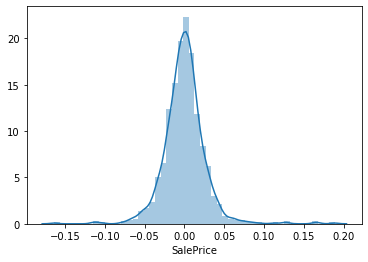

In [94]:
# Now let's check the error terms are also normally distributed as per the assumptions of linear regression model. 
# The below mentioned histogram is almost showing a normal curve with mean value centered around zero and similar slight bulge arounf the tail. 

residual = y_train - y_train_pred_lasso
sns.distplot(residual) 

Since, the number of features in the set was very high and lasso has performed well in both train and test r2 scores and also simplified the model by feature reduction we will use Lasso Regression model with Alpha = 0.0001 as our final model.